<a href="https://colab.research.google.com/github/kashish45/Scaler_Data_Science/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 16.5 MB/s 
     |████████████████████████████████| 7.6 MB 45.1 MB/s 
     |████████████████████████████████| 182 kB 66.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Image
from tqdm import tqdm
from nltk.tokenize import sent_tokenize
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt

from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

# Business Case

* You are a Data scientist working in a Medical Research publication company.
* As 100s of articles are published every single day, the organizers wants to identify which diseases are being spoke in the article.
* Manually reading the articles and identifying the disease is a laborious process.
* As a data scientist you are asked, if you can train a machine Learning model to automatically  identify the diseases mentioned in the corpus with the limited training data available

### What kind of a NLP problem is it?

We want to find what diseases are mentioned in the document. So can it be a classification problem?

### No? but why?
* The types of diseases could be varying, as more than 1 disease can be spoken in the document.
* if we treat this as a binary/multiclass classification, then we want the number of labels to be fixed.
* In this case the number of labels are not fixed

### Then which category of NLP problem this comes under?
Since we want to extract the diseases/disease phrases from the text we will treat this as a Named Entity Recognition problem.

### To solve this problem we will be training a NER model using BERT.
* We can use NER models available in Spacy or train RNN models, etc
* Since BERT has been the State Of The Art in the almost all NLP task in the recent years, we will use it to train with our corpus

### But why is BERT the SOTA and how was it able to achieve?
* BERT has been outperforming in almost all benchmarking NLP task like Question Answering, Next Sentence Prediction tasks etc
* Because of the way it was pretrained with rich corpus of data it was able to achieve SOTA results.
* We will see the details in the subsequent sections

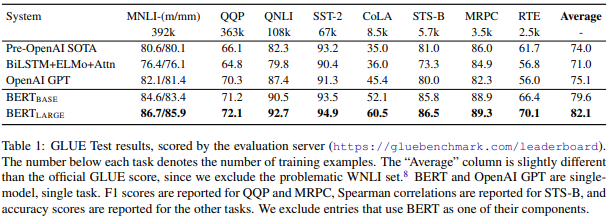

## Let us begin with what is BERT?

* BERT stands for BiDirectional Encoder Representation from Transformers released by Google Research team in 2018
* BERT uses only the Encoder portion of the transformer's architecture which is the reason it's called <b>Encoder Representation from transformers.</b>

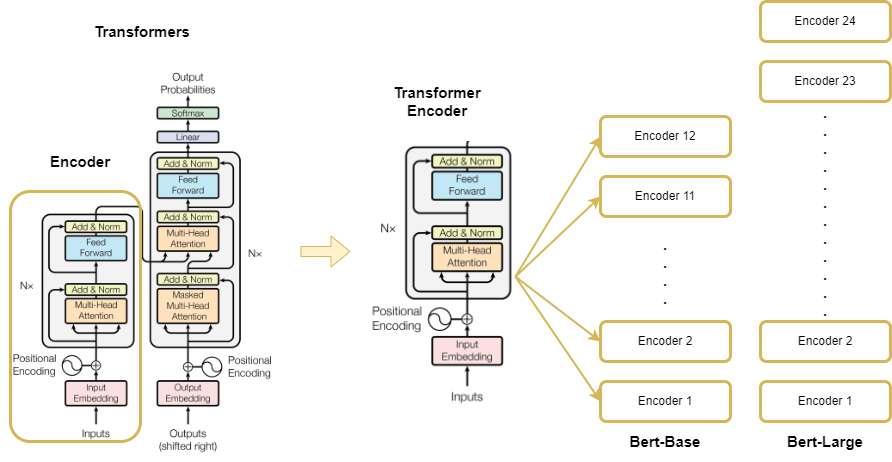

### How is BERT different from other architectures like RNN(LSTM/GRU)?


|RNN|BERT|
|-|-|
|It is built with recurrent blocks|It is built with transformer blocks|
|Each word in a sequence are <br> passed one after the other|The entire sentence is passed at once|
|If N is the no.of words in a sequence, <br> RNNs has to compute N sequential steps |It performs only one step for <br> the entire sequence of length N|
|Similarly for the gradients to propagate<br> from last word to the first word it takes N steps | In Bert, it is just one step process|
|Because of sequential processing <br> there is no parallelization | It can be parallelization since <br> it is not passed sequentially |
|They suffer from Vanishing gradients <br> though LSTM/GRU can handle to an extent | Bert does not suffer from Vanishing gradient <br> problem and can learn long term dependencies very well|
|No self attention|Has self attenion|
    


## Is BERT a word embedding model or a pretrained model?
Though we might have learnt it before. Let's understand the difference:

<b>Embedding model:</b>
* In Embedding models you only get the embeddings for each word or sentence of specified dimensions
* With the embeddings, you will have to fit a ML model like Logistic Regression, Random Forest, XGboost etc or even NN using the embeddings as features.
* Example: Word2Vec, Glove, ELmo etc

<b>Pretrained model:</b>
* If you are familiar with transfer learning/pretrained models in computer vision like AlexNet, VGGNet, the same concept is used here where the architecure of the pre-trained models with weights are fixed.
* You can just add the output layer with different number of neurons based on your task.

### So now is BERT a word embedding model or a pretrained model?
* Actually it is both.
<br>
$\;$ * Just like other word embedding models like Word2Vec, ELmo, Glove etc you can extract the word embedding for each word/sentences.
<br>
$\;$ * This can be achieved by accessing the embedding layer before it is passed to the Encoder portion of the architecture.
<br>
$\;$ * You can also use the BERT architecure with random weights or pretrained weights to train a model just like pretrained models in computer vision by transfer learning.

<b>Can we use Random weights instead of Pretrained weights?</b>
<br>
* In >90% of the cases we use the pretrained weights since these weights are trained weights are trained on general purpose corpus, it's easy to optimize.
<br>
* If we start with random weights, It can even take days/weeks to get good results compared to starting from pre-trained weights
<br>

<b>But is there any usecase we can start with Random weights?</b>
<br>
* Yes it can be useful in some cases where you are trying to pre-train a BERT model from scratch specific to a domain.
Example:

<b>BIO-BERT:</b> It is pretrained on the corpus specific to  Medical domain.
<br>
<b>LawBERT:</b> It is pretrained on the corpus specific to Legal domain.

Once pretrained these weights can be used for task specific to that domain instead of starting from the native BERT embeddings.

### How was it pre-trained?

* Bert was trained on two tasked
<br>
    1. Predicting the masked words
    <br>
    2. Next Sentence Prediction

### What was the data that it was pretrained on?
* It was Pretained on Wikipedia(2500 million words) and Book Corpus(800 million words)
<br>


## 1. Predicting the masked words
* Masking 15% of the words and predict them
<br>
$\;\;$ * By Randomly masking 15% of the words in the corpus the, model was trained to predict the masked words.
<br>

$\;\;\;\;$ <b>Example:</b>


| Actual sentence | Masked train sentence | Label |
| -|-|- |
| Today morning, I went for <br> a tooth removal to my dentist|Today morning, I went for a  <br> <b>< MASK ></b> removal to my dentist| tooth |
| Did you go to school today |  Did you <b>< MASK ></b> to school today | go |


## 2. Next Sentence Prediction
* Predicting if the next sentence is continuation of the previous sentence or not
<br>

$\;\;\;\;$ <b>Example:</b>


| Sentence A | Sentence B | IsNext? |
|-|-|-|
| The Indian cricket team won <br> the match against West Indies. | Obama served 2 terms as <br> the president of USA. | No |
| Nadal won the 2022 Australian open. | With this victory he now has 21 <br> GrandSlam titles to his name. | Yes |

### But why do we need a NSP and why not just MLM alone?
* In MLM, the model is learning the contextual information well. But for someother downstream tasks like QnA, text generation etc, MLM was not capturing the relations retionship between sentences.
* By pretraining with the MLM and NSP together, they were able to achieve good performance on QnA and NLI tasks

### Training data and label generation

* The data was generated in such a way that 50% of the time the Sentence B is a continuation of Sentence A and labeled as True for < IsNext >
* In the rest 50%, Sentence B is randomly sampled which is not a continuation of Sentence A and labeled as False for < IsNext >
* The combined length of the two chosen sentences was <= 512 tokens.
* Once each sequence was built, 15% of its tokens were masked for the MLM task

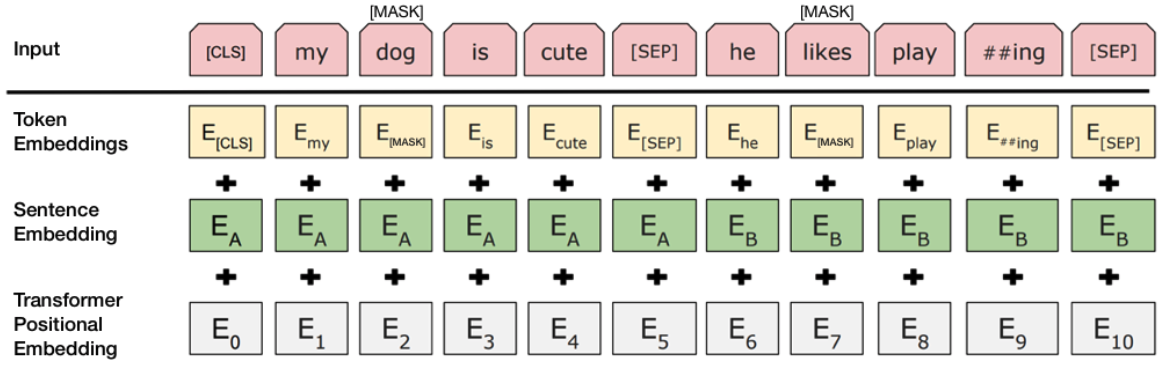

### How is the loss calculated?
* As we saw BERT is pretrained on two tasks <b>MLM</b> and <b>NSP</b> together, the losses from both the tasks are summed together to get the final loss.

### But the training data is not labelled, What type of learning is it?
* This method of training is called semi-supervised learning method.
<br>
$\;\;\;\;$ * Semi-supervised training sits between supervised and unsupervised training.
<br>
$\;\;\;\;$ * In this method we don't have labels like supervised learning but we try to create labels from the data available and not manually labelling them.
<br>


### Which of the 2 is it easier to predict?
* Today morning, I went for a ___
<br>
* Today morning, I went for a ___ removal to my dentist

In the example above it is easier to predict in the sencond instance comapred to 1st, since we can see what are the words coming after the ___.

### What is Bidirectional about Bert?
    
* Has access to the words to the <b>left</b> and <b>right</b> of the masked word.
<br>
$\;\;$ * When training the model to predict the masked word it has access to the words to the left and the right side of the masked word.
<br>
$\;\;$ * This method helps in understanding the context of the language better unlike having access only to the words from left of the masked words.
<br>
$\;\;$ * For this reason <b>BERT</b> is called a <b>Masked Language Model</b>, whereas  other architecures like <b>GPT</b> are called <b>Language model</b> since they have access to words only from the left to make the prediction of the next word.


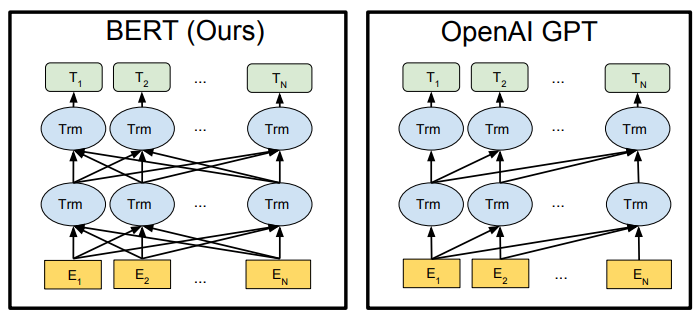

### What is self-attention.

* Self attention is process of giving more weightage to the input words/phrases that are contextually related to eath other.
* This is achieved with the help of <b>multiple attention heads</b>.
* The multi-head helps to learn different contextual relation between words from the input text.

$\;\;\;$ Example:
<br>
$\;\;\;$ * Relations like singular and plural
    <br>
$\;\;\;$ * Gender relation like he/she/it
    <br>
$\;\;\;$ * Tenses - present, past, future etc

* We can think of it to be something similar to kernel operations in CNN where each kernel learns different features from the image


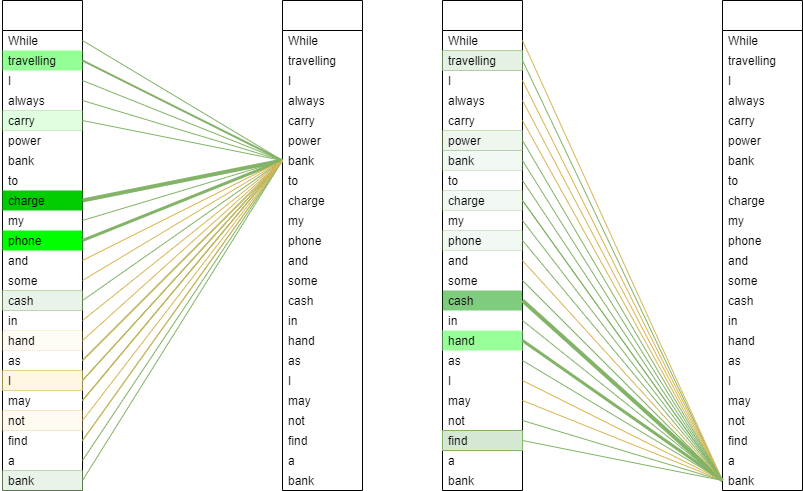

### Positional Encoding
Example: the word bank can represent financial bank, charging power bank or even river bank.

Let's understand it with an example

<b>Example sentence: </b> While travelling, I always carry a power <b>bank</b> to charge my phone and have some cash in hand as I may not find a <b>bank</b> nearby.
<br>

For simplicity, let's assume the word embedding are composed of 3 dimension, then
<br>
$\;\;\;$ bank = [0.45, 0.23, 0.98]

When this embedding is used in power bank or a financial bank it may not be able to understand the contextual differences.

<b>Contextual embedding</b>
<br>
$\;\;\;$ bank = [0.45, 0.23, 0.98] referring to power bank
<br>
$\;\;\;$ bank = [0.89, 0.93, 0.62] referring to financial bank

However based on the context if the embedding is different for the same word then the model will be able to learn better.

### How are the words tokenized in Bert?

* Word Piece Tokenizer method
<br>
$\;\;$ * Bert uses a special tokenization mechanism called the WordPiece Tokenizer where compound words are split into root word and subwords separated with <b>##</b>.
<br>
$\;\;$ * The word-based tokenizer suffers from very large vocabulary, large number of OOV tokens which is addressed by Word Piece Tokenizer

* Let's look at a example

In [ ]:
words = ['parachute', 'paraglide', 'paragliding', 'scubadiving', 'scubadiver', 'scubadive']

for word in words:
    tok_word = tokenizer.tokenize(word)
    print(f'{word:<12} tokenized to {tok_word}')

parachute    tokenized to ['parachute']
paraglide    tokenized to ['para', '##gli', '##de']
paragliding  tokenized to ['para', '##gli', '##ding']
scubadiving  tokenized to ['scuba', '##di', '##ving']
scubadiver   tokenized to ['scuba', '##di', '##ver']
scubadive    tokenized to ['scuba', '##di', '##ve']


# Types of Bert
* There are 4 variants of BERT based on the number of encoder blocks and Attention heads.
    
| Variants | Encoder Block | Attention heads | Hidden size | Case Sensitive | Parameters |
| - | - | - | - | - | - |
| Bert-Base-uncased | 12 | 12 | 768 | No | 110M |
| Bert-Base-cased | 12 | 12 | 768 | Yes | 110M |
| Bert-Large-uncased | 24 | 16 | 1024 | No | 340M |
| Bert-Large-cased | 24 | 16 | 1024 | Yes | 340M |

# Code implementation

In [ ]:
from transformers import TFBertForTokenClassification
from transformers import BertTokenizer
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

### Reading the training dataset

In [ ]:
!gdown 1cYbdeIWENeNLeFyovNUpVrGCns1OdR_z
!gdown 1bSt1p9beLkH15kGKHjY3BK5jqmuLKNRn
!gdown 1A4pa0O1o4q2a2Iq8-yud5dwH3yOwDz4Q

Downloading...
From: https://drive.google.com/uc?id=1cYbdeIWENeNLeFyovNUpVrGCns1OdR_z
To: /content/NCBI_corpus_development.txt
100% 165k/165k [00:00<00:00, 90.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bSt1p9beLkH15kGKHjY3BK5jqmuLKNRn
To: /content/NCBI_corpus_testing.txt
100% 174k/174k [00:00<00:00, 106MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A4pa0O1o4q2a2Iq8-yud5dwH3yOwDz4Q
To: /content/NCBI_corpus_training.txt
100% 960k/960k [00:00<00:00, 141MB/s]


In [ ]:
train_path = "NCBI_corpus_training.txt"
dev_path = "NCBI_corpus_development.txt"
test_path = "NCBI_corpus_testing.txt"

train_set = pd.read_csv(train_path,
                        sep="\t",
                        error_bad_lines=False,
                       header=None)

dev_set = pd.read_csv(dev_path,
                        sep="\t",
                        error_bad_lines=False,
                       header=None)

test_set = pd.read_csv(test_path,
                        sep="\t",
                        error_bad_lines=False,
                       header=None)

df = pd.concat([train_set, dev_set, test_set]).reset_index(drop=True)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 15: expected 3 fields, saw 4\nSkipping line 578: expected 3 fields, saw 4\n'


,0,1,2
0,10021369,"Identification of APC2, a homologue of the <ca...","The <category=""Modifier"">adenomatous polyposis..."
1,10051005,A common MSH2 mutation in English and North Am...,"The frequency , origin , and phenotypic expres..."
2,10051007,"Age of onset in <category=""SpecificDisease"">Hu...","Age of onset ( AO ) of <category=""SpecificDise..."
3,100562,"<category=""SpecificDisease"">Familial deficienc...",The serum of a 29-year old woman with a recent...
4,10064668,"Increased incidence of <category=""DiseaseClass...",OBJECTIVE Previous reports have suggested an ...
...,...,...,...
786,9949197,Distribution of emerin and lamins in the heart...,Emerin is a nuclear membrane protein which is ...
787,9949209,"Genetic mapping of the <category=""Modifier"">co...","Abnormal <category=""SpecificDisease"">hepatic c..."
788,9950360,"Molecular analysis of the <category=""Modifier""...",BACKGROUND / AIMS The development of <categor...
789,9973276,"<category=""SpecificDisease"">Inherited colorect...",Germ-line and somatic truncating mutations of ...


# Pre-processing
* The data is split into two columns as 1 and 2. We will combine both into a single column "all_text

In [ ]:
def combine_text(data):
    data = data.rename(columns = {0:'id', 1:'text_1', 2:'text_2'})
    data['all_text'] = data['text_1'] + " " + data['text_2']
    data = data.drop(['text_1', 'text_2'], axis=1)
    data['all_text'] = data.all_text.str.replace('"', "")

    return data

final_set = combine_text(data=df)
final_set

,id,all_text
0,10021369,"Identification of APC2, a homologue of the <ca..."
1,10051005,A common MSH2 mutation in English and North Am...
2,10051007,Age of onset in <category=SpecificDisease>Hunt...
3,100562,<category=SpecificDisease>Familial deficiency ...
4,10064668,Increased incidence of <category=DiseaseClass>...
...,...,...
786,9949197,Distribution of emerin and lamins in the heart...
787,9949209,Genetic mapping of the <category=Modifier>copp...
788,9950360,Molecular analysis of the <category=Modifier>A...
789,9973276,<category=SpecificDisease>Inherited colorectal...


# Word count distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


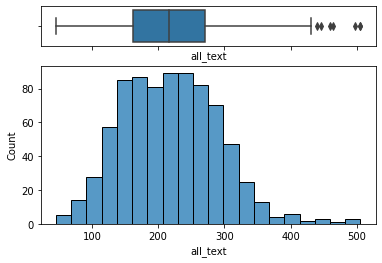

In [ ]:
word_count = final_set.all_text.str.split().str.len()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)})

# assigning a graph to each ax
sns.boxplot(word_count, ax=ax_box)
sns.histplot(word_count, ax=ax_hist)

# Let's quickly look at 1 sample data

In [ ]:
final_set.all_text[2]

'Age of onset in <category=SpecificDisease>Huntington disease</category> : sex specific influence of apolipoprotein E genotype and normal CAG repeat length . Age of onset ( AO ) of <category=SpecificDisease>Huntington disease</category> ( <category=SpecificDisease>HD</category>) is known to be correlated with the length of an expanded CAG repeat in the <category=Modifier>HD</category> gene . Apolipoprotein E ( APOE ) genotype , in turn , is known to influence AO in <category=SpecificDisease>Alzheimer disease</category> , rendering the APOE gene a likely candidate to affect AO in other <category=DiseaseClass>neurological diseases</category> too . We therefore determined APOE genotype and normal CAG repeat length in the <category=Modifier>HD</category> gene for 138 <category=Modifier>HD</category> patients who were previously analysed with respect to CAG repeat length . Genotyping for APOE was performed blind to clinical information . In addition to highlighting the effect of the normal 

* The dataset contains 4 categories of entities like
    1. Modifier,
    2. SpecificDisease,
    3. DiseaseClass
    4. CompositeMention.
* But in this usecase we will only train a model to identify the <b>SpecificDisease</b>

# More Pre-processing

* The labels are mentioned in between the < category= >   < / category> tags
* We will extract the entities between <category=SpecificDisease> < / category> as labels.
* Once the labels are extracted, we will replace all the tags with spaces.

In [ ]:
def extract_disease_labels(string):

    pattern = "<category=SpecificDisease>(.*?)</category>"
    label = re.findall(pattern, string)
    label = np.unique(label).tolist()

    return label

def replace_tags(string):
    sub_list = ['<category=Modifier>',
                '<category=SpecificDisease>',
                '<category=DiseaseClass>',
                '<category=CompositeMention>',
                '</category>']
    for sub in sub_list:
        string = string.replace(sub, "")

    return string

final_set['label'] = final_set.all_text.apply(lambda x: extract_disease_labels(x))
final_set['train_text'] = final_set.all_text.apply(lambda x: replace_tags(x))
final_set

,id,all_text,label,train_text
0,10021369,"Identification of APC2, a homologue of the <ca...",[cancer],"Identification of APC2, a homologue of the ade..."
1,10051005,A common MSH2 mutation in English and North Am...,"[HNPCC, colorectal cancer, endometrial cancer,...",A common MSH2 mutation in English and North Am...
2,10051007,Age of onset in <category=SpecificDisease>Hunt...,"[Alzheimer disease, HD, Huntington disease]",Age of onset in Huntington disease : sex speci...
3,100562,<category=SpecificDisease>Familial deficiency ...,"[C7 deficiency, Complete absence of C7, Famili...",Familial deficiency of the seventh component o...
4,10064668,Increased incidence of <category=DiseaseClass>...,"[CHH, basal cell carcinoma, cartilage-hair hyp...",Increased incidence of cancer in patients with...
...,...,...,...,...
786,9949197,Distribution of emerin and lamins in the heart...,"[EDMD, Emery-Dreifuss muscular dystrophy]",Distribution of emerin and lamins in the heart...
787,9949209,Genetic mapping of the <category=Modifier>copp...,"[CT, WD, Wilson disease, copper overload, copp...",Genetic mapping of the copper toxicosis locus ...
788,9950360,Molecular analysis of the <category=Modifier>A...,"[FAP, colorectal cancer, familial adenomatous ...",Molecular analysis of the APC gene in 205 fami...
789,9973276,<category=SpecificDisease>Inherited colorectal...,"[Inherited colorectal polyposis, adenomatous p...",Inherited colorectal polyposis and cancer risk...


In [ ]:
ind = 1

print('Before preprocessing:')
print()
print(final_set.all_text[ind])
print()
print('After preprocessing')
print()
print(final_set.train_text[ind])
print()
print('Labels:')
print(final_set.label[ind])


Before preprocessing:

A common MSH2 mutation in English and North American <category=Modifier>HNPCC</category> families: origin, phenotypic expression, and sex specific differences in <category=SpecificDisease>colorectal cancer</category> . The frequency , origin , and phenotypic expression of a germline MSH2 gene mutation previously identified in seven kindreds with <category=SpecificDisease>hereditary non-polyposis cancer syndrome</category> (<category=SpecificDisease>HNPCC</category>) was investigated . The mutation ( A-- > T at nt943 + 3 ) disrupts the 3 splice site of exon 5 leading to the deletion of this exon from MSH2 mRNA and represents the only frequent MSH2 mutation so far reported . Although this mutation was initially detected in four of 33 <category=Modifier>colorectal cancer</category> families analysed from eastern England , more extensive analysis has reduced the frequency to four of 52 ( 8 % ) English <category=Modifier>HNPCC</category> kindreds analysed . In contras

In [ ]:
final_set['total_words'] = final_set.train_text.apply(lambda x : len(x.split()))
final_set

,id,all_text,label,train_text,total_words
0,10021369,"Identification of APC2, a homologue of the <ca...",[cancer],"Identification of APC2, a homologue of the ade...",190
1,10051005,A common MSH2 mutation in English and North Am...,"[HNPCC, colorectal cancer, endometrial cancer,...",A common MSH2 mutation in English and North Am...,439
2,10051007,Age of onset in <category=SpecificDisease>Hunt...,"[Alzheimer disease, HD, Huntington disease]",Age of onset in Huntington disease : sex speci...,206
3,100562,<category=SpecificDisease>Familial deficiency ...,"[C7 deficiency, Complete absence of C7, Famili...",Familial deficiency of the seventh component o...,221
4,10064668,Increased incidence of <category=DiseaseClass>...,"[CHH, basal cell carcinoma, cartilage-hair hyp...",Increased incidence of cancer in patients with...,230
...,...,...,...,...,...
786,9949197,Distribution of emerin and lamins in the heart...,"[EDMD, Emery-Dreifuss muscular dystrophy]",Distribution of emerin and lamins in the heart...,322
787,9949209,Genetic mapping of the <category=Modifier>copp...,"[CT, WD, Wilson disease, copper overload, copp...",Genetic mapping of the copper toxicosis locus ...,258
788,9950360,Molecular analysis of the <category=Modifier>A...,"[FAP, colorectal cancer, familial adenomatous ...",Molecular analysis of the APC gene in 205 fami...,253
789,9973276,<category=SpecificDisease>Inherited colorectal...,"[Inherited colorectal polyposis, adenomatous p...",Inherited colorectal polyposis and cancer risk...,272


# Defining the configuration dictionary

In [ ]:
config = {'MAX_LEN': 512,
          'tokenizer':BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True),
          'batch_size':8,
          'model_name':'NER_model.h5'
         }

# Bert for Token classification
* To solve this business case of identifying the disease entities from text we will use the Token classification method HuggingFace's Transformer library

### What is Token classification?
* Each word in a sentence is split into list of words/token.
* Label the disease tokens as 1 and others as 0.
* Train the BERT model to classify each word if it's a disease.
* Since we are classifying each words in the sentence it is called Token classification

Let's look at a simple example
<br>
<b>Train sentence:</b> "The intersex differences in colorectal cancer risks have implications"


<b>Tokens:</b> ["The", "intersex", "differences", "in", "colorectal", "cancer", "risks", "have", "implications"]
<br>
<b>Token ids:</b> [1996, 6970, 3366, 2595, 5966, 1999, 3609, 22471, 2389, 4456, 10831, 2031, 13494]

<b>Label entity</b>: "colorectal cancer"
<br>
<b>Train label:</b> [O, O, O, O, B, B, O, O, O]
<br>
<b>Label:</b> [0, 0, 0, 0, 1, 1, 0, 0, 0]

Label positions are denoted as B. However when we have to pass it to the model we will have to convert them into numerical representation

We will convert them as follows: {'O': 0 , 'B': 1, 'P': 2}

Similarly the input train sentence will be converted to their respective token id

Here P means padding which is appended to our train and label when the total word count in the sentence is not equal to the mentioned MAX_LEN in config

In [ ]:
def clean_text(txt):
    '''
    This is text cleaning function
    '''
    return re.sub('[^A-Za-z0-9]+', ' ', str(txt).lower())


def sentence_BO_labels(sentence, labels_list):
    '''
    This function labels the training data
    '''
    matched_kwords = []
    matched_token = []
    un_matched_kwords = []
    label = []

    # Since there are many sentences which are more than 512 words,
    # Let's make the max length to be 128 words per sentence.

    sent_tokens = sent_tokenize(sentence)

    for tok in sent_tokens:
        tok = clean_text(tok)

        tok_split = config['tokenizer'].tokenize(tok)

        z = np.array(['O'] * len(tok_split)) # Create final label == len(tokens) of each sentence
        matched_keywords = 0 # Initially no kword matched

        for kword in labels_list:
            if kword in tok: #This is to first check if the keyword is in the text and then go ahead
                kword_split = config['tokenizer'].tokenize(kword)
                for i in range(len(tok_split)):
                    if tok_split[i: (i + len(kword_split))] == kword_split:
                        matched_keywords += 1

                        if (len(kword_split) == 1):
                            z[i] = 'B'
                        else:
                            z[i] = 'B'
                            z[(i+1) : (i+ len(kword_split))]= 'B'

                        if matched_keywords >1:
                            label[-1] = (z.tolist())
                            matched_token[-1] = tok
                            matched_kwords[-1].append(kword)
                        else:
                            label.append(z.tolist())
                            matched_token.append(tok)
                            matched_kwords.append([kword])
                    else:
                        un_matched_kwords.append(kword)

    return matched_token, matched_kwords, label, un_matched_kwords

In [ ]:
def labelling(dataset):
    id_list_ = []
    sentences_ = []
    key_ = []
    labels_ = []
    un_mat = []
    un_matched_reviews = 0

    for i, data in tqdm(dataset.iterrows(), total=dataset.shape[0]):
        Id = data['id']
        sentence = data['train_text']
        label_list = data['label']

        s, k, l, unmatched = sentence_BO_labels(sentence=sentence, labels_list=label_list)

        if len(s) == 0:
            un_matched_reviews += 1
            un_mat.append(unmatched)
        else:
            sentences_.append(s)
            key_.append(k)
            labels_.append(l)
            id_list_.append([Id]*len(l))

    print("Total unmatched keywords:", un_matched_reviews)
    sentences = [item for sublist in sentences_ for item in sublist]
    final_labels = [item for sublist in labels_ for item in sublist]
    keywords = [item for sublist in key_ for item in sublist]
    Id_list = [item for sublist in id_list_ for item in sublist]

    return sentences, final_labels, keywords, Id_list

# Pad the shorter sentences

In [ ]:
tags_2_idx = {'O': 0 , 'B': 1, 'P': 2} # 'P' means padding.

def pad_seq_label(sentence, labels):

    padded_tok_sent = []
    padded_sent_ids = []
    padded_tok_type_id = []
    padded_att_mask = []
    padded_labels = []

    for (sent, label) in tqdm(zip(sentence, labels), total=len(labels)):

        tok_sent = config['tokenizer'].tokenize(sent)
        tok_sent_len = len(tok_sent)
        pad_len = config['MAX_LEN'] - tok_sent_len

        # Forming the inputs
        sent_ids = config['tokenizer'].convert_tokens_to_ids(tok_sent)
        sent_tok_type_id = [0] * tok_sent_len
        sent_att_mask = [1] * tok_sent_len

        # Padding
        tok_sent = tok_sent + (['<pad>']*pad_len)
        sent_ids = sent_ids + [0]*pad_len
        sent_tok_type_id = sent_tok_type_id + [0]*pad_len
        sent_att_mask = sent_att_mask + [0]*pad_len
        label = label + (['P']*pad_len)
        label = list(map(tags_2_idx.get, label))

        # Appending all the inputs
        padded_tok_sent.append(tok_sent)
        padded_sent_ids.append(sent_ids)
        padded_tok_type_id.append(sent_tok_type_id)
        padded_att_mask.append(sent_att_mask)
        padded_labels.append(label)

    return padded_tok_sent, padded_sent_ids, padded_tok_type_id, padded_att_mask, padded_labels


# Install NLTK

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train_sentences, train_labels, train_keywords, train_Id_list = labelling(dataset = final_set)

print("")
print(f" train sentences: {len(train_sentences)}, train label: {len(train_labels)}, train keywords: {len(train_keywords)}, train_id list: {len(train_Id_list)}")

train_tok_sent, train_sent_ids, train_tok_type_id, train_att_mask, train_labels = pad_seq_label(sentence=train_sentences, labels=train_labels)

100%|██████████| 791/791 [00:05<00:00, 139.86it/s]


Total unmatched keywords: 301

 train sentences: 1410, train label: 1410, train keywords: 1410, train_id list: 1410


100%|██████████| 1410/1410 [00:01<00:00, 1205.26it/s]


### Let's look at a sample of the sentence_id, tok_id, attention_mask_id

In [ ]:
ind = 10
print("Sentence")
print(train_sentences[ind])
print()
print("Tokenized sentence")
print(train_tok_sent[ind])
print()
print("Sentence Id")
print(train_sent_ids[ind])
print()
print("Token Type id")
print(train_tok_type_id[ind])
print()
print("Token att mask id")
print(train_att_mask[ind])
print()
print("Label")
print(train_labels[ind])

Sentence
complete absence of c7 was also found in one sibling who had the clinical syndrome of meningococcal meningitis and arthritis as a child and in this siblings clinically well eight year old son 

Tokenized sentence
['complete', 'absence', 'of', 'c', '##7', 'was', 'also', 'found', 'in', 'one', 'sibling', 'who', 'had', 'the', 'clinical', 'syndrome', 'of', 'men', '##ing', '##oco', '##cca', '##l', 'men', '##ing', '##itis', 'and', 'arthritis', 'as', 'a', 'child', 'and', 'in', 'this', 'siblings', 'clinical', '##ly', 'well', 'eight', 'year', 'old', 'son', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>

### Why are the Token Type Ids all labelled as 0?
* Token type ids are used to identify the 2 sentences when we are training a next sentence classification or QnA task where tokens in sentence A is 0 and tokens in sentence B is 1.
* Since we are working on Token classification we can leave all the values to be 0. Sometime the token type id is also skipped when not training task involving 2 sentence relationship

### Token Attention Mask Id
* All the tokens from the sentence are marked as 1 and the padded tokens are marked as 0.
* The reason is we want the attention heads to pay attention only to the token in the sentences and not the padded tokens.

In [ ]:
df = pd.DataFrame({'id':train_Id_list,
                   'sentences':train_sentences,
                   'keywords': train_keywords,
                   'sentences_tok':train_tok_sent,
                   'sentences_id': train_sent_ids,
                   'sentences_tok_type_id': train_tok_type_id,
                   'sentences_att_mask': train_att_mask,
                   'labels': train_labels})
df

,id,sentences,keywords,sentences_tok,sentences_id,sentences_tok_type_id,sentences_att_mask,labels
0,10021369,apc and apc2 may therefore have comparable fun...,[cancer],"[ap, ##c, and, ap, ##c, ##2, may, therefore, h...","[9706, 2278, 1998, 9706, 2278, 2475, 2089, 356...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1,10051005,a common msh2 mutation in english and north am...,[colorectal cancer],"[a, common, ms, ##h, ##2, mutation, in, englis...","[1037, 2691, 5796, 2232, 2475, 16221, 1999, 23...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,10051005,although this mutation was initially detected ...,[colorectal cancer],"[although, this, mutation, was, initially, det...","[2348, 2023, 16221, 2001, 3322, 11156, 1999, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, ..."
3,10051005,to investigate the origin of this mutation in ...,[colorectal cancer],"[to, investigate, the, origin, of, this, mutat...","[2000, 8556, 1996, 4761, 1997, 2023, 16221, 19...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ..."
4,10051005,for both sexes combined the penetrances at age...,[colorectal cancer],"[for, both, sexes, combined, the, pen, ##et, #...","[2005, 2119, 21024, 4117, 1996, 7279, 3388, 21...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...
1405,9973276,we conclude that the apc i1307k variant leads ...,[colorectal cancer],"[we, conclude, that, the, ap, ##c, i, ##13, ##...","[2057, 16519, 2008, 1996, 9706, 2278, 1045, 17...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1406,9973276,the estimated relative risk for carriers may j...,[colorectal cancer],"[the, estimated, relative, risk, for, carriers...","[1996, 4358, 5816, 3891, 2005, 11363, 2089, 16...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1407,9988281,these reagents detect a 220 kd protein localiz...,[breast malignancies],"[these, re, ##age, ##nts, detect, a, 220, k, #...","[2122, 2128, 4270, 7666, 11487, 1037, 10545, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1408,9988281,immunohistochemical staining of human breast s...,[ductal carcinomas],"[im, ##mun, ##oh, ##isto, ##chemical, stain, #...","[10047, 23041, 11631, 20483, 15869, 21101, 207...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Splitting the data into train and validation

In [ ]:
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=100)

train_df, valid_df = train_df.reset_index(drop=True), valid_df.reset_index(drop=True)

train_df.shape, valid_df.shape

((1128, 8), (282, 8))

In [ ]:
train_sent_id = np.array(train_df.sentences_id.tolist())
train_tok_type_id = np.array(train_df.sentences_tok_type_id.tolist())
train_att_mask = np.array(train_df.sentences_att_mask.tolist())
train_label = np.array(train_df.labels.tolist())

valid_sent_id = np.array(valid_df.sentences_id.tolist())
valid_tok_type_id = np.array(valid_df.sentences_tok_type_id.tolist())
valid_att_mask = np.array(valid_df.sentences_att_mask.tolist())
valid_label = np.array(valid_df.labels.tolist())

print(train_sent_id.shape, train_tok_type_id.shape, train_att_mask.shape ,train_label.shape)
print(valid_sent_id.shape, valid_tok_type_id.shape, valid_att_mask.shape ,valid_label.shape)


(1128, 512) (1128, 512) (1128, 512) (1128, 512)
(282, 512) (282, 512) (282, 512) (282, 512)


### Model initialization

* We use the Bert-base-uncased pretrained model with the help of BertForTokenClassification class
* On top of the pretrained architecture we have added a 3 output neuron Dense layer with SoftMax

Do you want to guess why 3 Neurons on the output?

In [ ]:
encoder = TFBertForTokenClassification.from_pretrained("bert-base-uncased", output_hidden_states=True)

# NER Model
input_ids = Input(shape=(config['MAX_LEN'],), dtype=tf.int32)
token_type_ids = Input(shape=(config['MAX_LEN'],), dtype=tf.int32)
attention_mask = Input(shape=(config['MAX_LEN'],), dtype=tf.int32)

embedding = encoder(input_ids,
                    token_type_ids=token_type_ids,
                    attention_mask=attention_mask
                   )[0]
output_logits = Dense(len(tags_2_idx), activation='softmax')(embedding)

model = Model(inputs=[input_ids, token_type_ids, attention_mask],
              outputs=[output_logits]
             )
optimizer = Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForTokenClassification.

Some layers of TFBertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 tf_bert_for_token_classificati  TFTokenClassifierOu  108893186  ['input_1[0][0]',                
 on (TFBertForTokenClassificati  tput(loss=None, log              'input_3[0][0]',            

In [ ]:
model_name = "./model_512d_{epoch:03d}.h5"

save_model = tf.keras.callbacks.ModelCheckpoint(filepath=model_name,
                                                save_weights_only=True,
                                                save_best_only=True,
                                                verbose=1)

history = model.fit([train_sent_id,
                     train_tok_type_id,
                     train_att_mask],
                    train_label,
                    epochs=5,
                    validation_data=([valid_sent_id,
                                      valid_tok_type_id,
                                      valid_att_mask],
                                     valid_label),
                    batch_size=config['batch_size'],
                    callbacks=[save_model]
                   )

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


141/141 [==============================] - ETA: 0s - loss: 0.6018 - accuracy: 0.9296
Epoch 1: val_loss improved from inf to 0.50296, saving model to ./model_512d_001.h5
141/141 [==============================] - 158s 1s/step - loss: 0.6018 - accuracy: 0.9296 - val_loss: 0.5030 - val_accuracy: 0.9397
Epoch 2/5
141/141 [==============================] - ETA: 0s - loss: 0.4503 - accuracy: 0.9471
Epoch 2: val_loss improved from 0.50296 to 0.38986, saving model to ./model_512d_002.h5
141/141 [==============================] - 148s 1s/step - loss: 0.4503 - accuracy: 0.9471 - val_loss: 0.3899 - val_accuracy: 0.9477
Epoch 3/5
141/141 [==============================] - ETA: 0s - loss: 0.3464 - accuracy: 0.9482
Epoch 3: val_loss improved from 0.38986 to 0.29568, saving model to ./model_512d_003.h5
141/141 [==============================] - 147s 1s/step - loss: 0.3464 - accuracy: 0.9482 - val_loss: 0.2957 - val_accuracy: 0.9484
Epoch 4/5
141/141 [==============================] - ETA: 0s - loss: 

### Get the Prediction

* The prediction for each input will be of shape (Num_inputs, Max_len, total output)
* The output axis is the probabilities of the token belonging to 0, 1 or 2.
    * 0 - Non disease token
    * 1 - Disease token
    * 2 - Padded token
* We take the argmax along the axis=2, which results in a shape of (Num_inputs, Max_len)
* Let's look at a sample prediction output


In [ ]:
# Load the trained model
model.load_weights('./model_512d_003.h5')

In [ ]:
validation_predictions = model.predict([valid_sent_id,
                                        valid_tok_type_id,
                                        valid_att_mask])
validation_predictions_prob = validation_predictions.argmax(axis=2)

print(validation_predictions.shape)

9/9 [==============================] - 14s 1s/step
(282, 512, 3)


In [ ]:
validation_predictions_prob[0]

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### Let's get the disease tokens/phrase
* Now that we have the prediction for each sentence from the validation,we will have to get the corresponding tokens
* As we saw above the predictions are either 0, 1 or 2. So all predictions corresponding to 1 are the predicted keywords
* Given a input sentence we map the corresponding position of prediction==1 which is the Disease class we are interested in.
* Let's look at a example

Input sentence: 'the risk of colorectal cancer was significantly higher, for females there was a high risk of endometrial cancer'
<br>
token sentence: ['the', 'risk', 'of', 'color', '##ect', '##al', 'cancer', 'was', 'significantly', 'higher', ',', 'for', 'females', 'there', 'was', 'a', 'high', 'risk', 'of', 'end', '##ome', '##tri', '##al', 'cancer', '< PAD >'......'< PAD >']
<br>
Prediction: [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2......2]
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ => [['color', '##ect', '##al', 'cancer'], ['end', '##ome', '##tri', '##al', 'cancer']]
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ => "colorectal cancer"

In [ ]:
def get_predicted_entities(all_prediction, sub_sentence):

    final_kwords = []
    for i, prediction in enumerate(all_prediction):
        tkns = sub_sentence[i]
        kword = ''
        kword_list = []

        for k, j in enumerate(prediction):
            if (len(prediction)>1):
                if (j==1) & (k==0):
                    # If it's the first word in the first position
                    begin = tkns[k]
                    kword = begin
                elif (j==1) & (k>=1) & (prediction[k-1]==0):
                    # Begin word is in the middle of the sentence
                    begin = tkns[k]
                    previous = tkns[k-1]

                    if begin.startswith('##'):
                        kword = previous + begin[2:]
                    else:
                        kword = begin

                    if k == (len(prediction) - 1):
                        kword_list.append(kword.rstrip().lstrip())
                elif (j==1) & (k>=1) & (prediction[k-1]!=0):
                    # Intermediate word of the same keyword
                    inter = tkns[k]

                    if inter.startswith('##'):
                        kword = kword + "" + inter[2:]
                    else:
                        kword = kword + " " + inter


                    if k == (len(prediction) - 1):
                        kword_list.append(kword.rstrip().lstrip())
                elif (j==0) & (k>=1) & (prediction[k-1] !=0):
                    # End of a keywords but not end of sentence.
                    kword_list.append(kword.rstrip().lstrip())
                    kword = ''
                    inter = ''
            else:
                if (j!=0):
                    begin = tkns[k]
                    kword = begin
                    kword_list.append(kword.rstrip().lstrip())

        final_kwords.append(kword_list)
    return final_kwords

In [ ]:
validation_predictions= get_predicted_entities(all_prediction = validation_predictions_prob,
                                               sub_sentence = valid_df.sentences_tok.values)
valid_df['prediction'] = validation_predictions
valid_df.head(10)

,id,sentences,keywords,sentences_tok,sentences_id,sentences_tok_type_id,sentences_att_mask,labels,prediction
0,10807385,conclusions although brca associated hereditar...,"[hereditary ovarian cancers, ovarian cancers]","[conclusions, although, br, ##ca, associated, ...","[15306, 2348, 7987, 3540, 3378, 14800, 1051, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...",[]
1,1717985,piebaldism in this family thus appears to be t...,[piebaldism],"[pie, ##baldi, ##sm, in, this, family, thus, a...","[11345, 28807, 6491, 1999, 2023, 2155, 2947, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]
2,2055114,the human gene for histidase histidine ammonia...,[histidinemia],"[the, human, gene, for, his, ##ti, ##das, ##e,...","[1996, 2529, 4962, 2005, 2010, 3775, 8883, 206...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]
3,9425239,the genetic basis of myotonic dystrophy dm is ...,[myotonic dystrophy],"[the, genetic, basis, of, my, ##oton, ##ic, d,...","[1996, 7403, 3978, 1997, 2026, 25862, 2594, 10...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...",[]
4,7939630,the brca1 region is also subject to allelic lo...,[sporadic breast and ovarian cancers],"[the, br, ##ca, ##1, region, is, also, subject...","[1996, 7987, 3540, 2487, 2555, 2003, 2036, 339...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",[]
5,2055114,the localization of histidase to mouse chromos...,[histidinemia],"[the, local, ##ization, of, his, ##ti, ##das, ...","[1996, 2334, 3989, 1997, 2010, 3775, 8883, 206...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]
6,1302003,aberrant splicing of the chm gene is a signifi...,[choroideremia],"[abe, ##rran, ##t, sp, ##lic, ##ing, of, the, ...","[14863, 28327, 2102, 11867, 10415, 2075, 1997,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]
7,7761412,lowe syndrome also known as oculocerebrorenal ...,[oculocerebrorenal syndrome],"[lowe, syndrome, also, known, as, o, ##cu, ##l...","[14086, 8715, 2036, 2124, 2004, 1051, 10841, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...",[]
8,1978564,a genetic linkage map of six polymorphic dna m...,[familial adenomatous polyposis],"[a, genetic, link, ##age, map, of, six, poly, ...","[1037, 7403, 4957, 4270, 4949, 1997, 2416, 265...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]
9,9931324,here we present four novel pax6 missense mutat...,"[aniridia, congenital nystagmus, displaced pup...","[here, we, present, four, novel, pa, ##x, ##6,...","[2182, 2057, 2556, 2176, 3117, 6643, 2595, 257...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]


# More architectures based on Transformers

| Encoder only | Decoder only | Encoder + Decoder |
|-|-|-|
|BERT <br> RoBerta <br> Reformer <br> FlauBert <br> CamemBert <br> Longformer|Transformer-XL <br> XLNet <br> GPT|Transformer <br> T5 <br> XLM <br> XLM-RoBerta <br> BART|


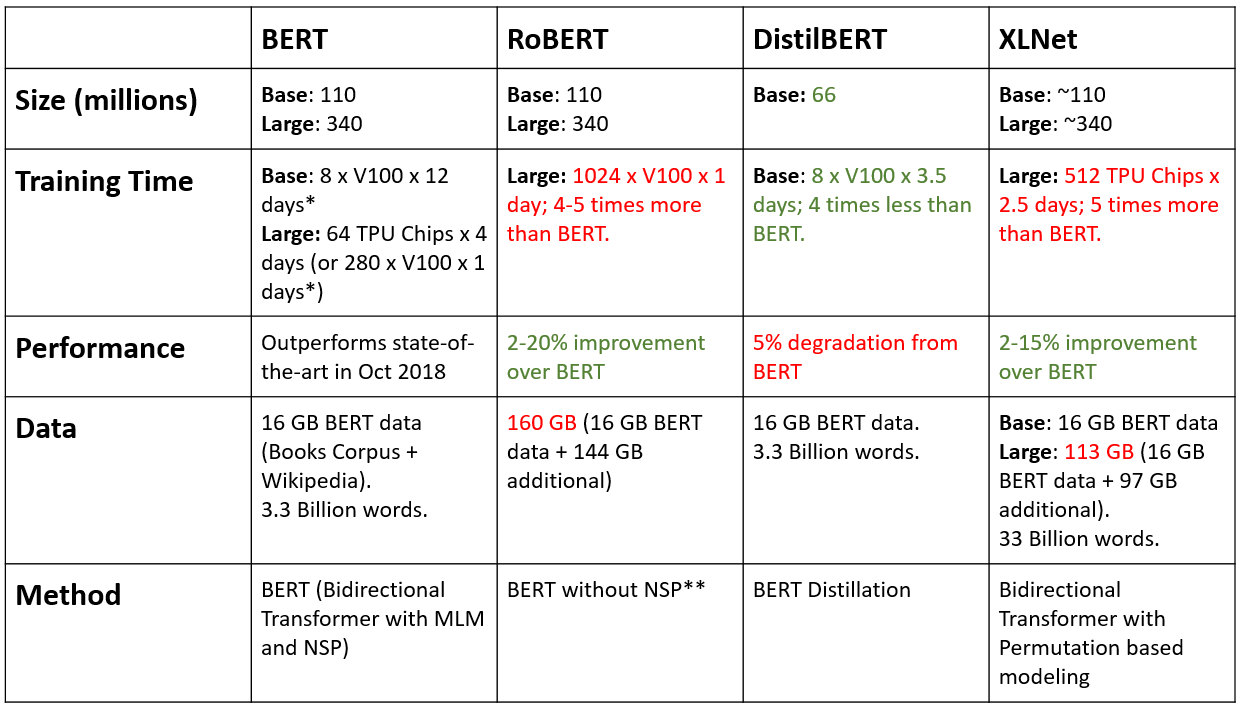